# Rain in Australia: Predict rain tomorrow in Australia
### Monica

Date: 18-10-2019

Version: 3.1.2

Environment: Python 3.6, Jupyter Notebook

## Libraries used:
* matplotlib
* pyspark.ml
* pyspark.sql
* pyspark

## Datasets used:
* Rain in Australia (__weatherAUS.csv__)

__________________________________________________________________

# A. Creating Spark Session and Loading the Data

## Step 01: Import Spark Session and initialize Spark

* __PySpark__ is the Python API written in python to support Apache Spark.
* __SparkSession__ is a unified entry point of a spark application from Spark 2.0. It provides a way to interact with various spark’s functionality with a lesser number of constructs.
* __SparkContext__ is the entry point to any spark functionality. When we run any Spark application, a driver program starts, which has the main function and your SparkContext gets initiated here. The driver program then runs the operations inside the executors on worker nodes.
* __builder__ is used to set up or construct SparkSession instances.
* __master__ is the URL of the cluster it connects to. We use a local server with as many working processors (or threads) as possible (i.e. 'local[k]'). If we want Spark to run locally with 'k' worker threads, we can specify as 'local[k]'.
* __local[4]__, Spark is run locally with as many processors as logical cores in the current running machine, in this case 4. This is assigned to "master" as it  uses local server with as many logical processors or core available.
* __appName()__ is the name of the job or application. It is displayed in the Sparking cluster UI.
* __getOrCreate()__ is added to avoid an error : "Cannot run multiple SparkContexts at once". If there is an existing SparkContext, we will reuse it instead of creating a new context.

In [1]:
# creating entry points to spark

# Spark
from pyspark import SparkContext
# Spark Sql
from pyspark.sql import SparkSession

# Creating RDDs with 4 local cores
# Building a new SparkSession with 4 local cores
spark = SparkSession.builder.\
        master("local[4]").\
        appName('FIT5202 Assessment2:Predicting Rain').\
        getOrCreate()

# displaying the SparkSession/SparkContext
spark

__________________________________________________________________

## Step 02: Load the dataset and print the schema and total number of entries

* Load the dataset 'weatherAUS.csv'
* Print the Schema of the Dataset
* Calculating the Toatl Number of entries in the Dataset

In [2]:
# loading the dataset into python
data=spark.read.csv('weatherAUS.csv',inferSchema=True,header=True)

# printing the schema of the dataset
print('Schema of the Dataset:')
data.printSchema()

# printing the total number of entries
print('Total Number of Entries in the Dataset:',data.count())
print('Total Number of Columns in the Dataset:',len(data.columns))

Schema of the Dataset:
root
 |-- Date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)

Total Number of 

In [3]:
# displaying a sample record
data.show(1,vertical=True)

-RECORD 0----------------------------
 Date          | 2008-12-01 00:00:00 
 Location      | Albury              
 MinTemp       | 13.4                
 MaxTemp       | 22.9                
 Rainfall      | 0.6                 
 Evaporation   | NA                  
 Sunshine      | NA                  
 WindGustDir   | W                   
 WindGustSpeed | 44                  
 WindDir9am    | W                   
 WindDir3pm    | WNW                 
 WindSpeed9am  | 20                  
 WindSpeed3pm  | 24                  
 Humidity9am   | 71                  
 Humidity3pm   | 22                  
 Pressure9am   | 1007.7              
 Pressure3pm   | 1007.1              
 Cloud9am      | 8                   
 Cloud3pm      | NA                  
 Temp9am       | 16.9                
 Temp3pm       | 21.8                
 RainToday     | No                  
 RainTomorrow  | No                  
only showing top 1 row



__________________________________________________________________

# B. Data Cleaning and Processing

## Step 03: Delete columns from the dataset
Delete unnecessary data from the dataset to improve the efficiency and accuracy of the model.
* Date<br>
* Location<br>
* Evaporation<br>
* Sunshine<br>
* Cloud9am<br>
* Cloud3pm<br>
* Temp9am<br>
* Temp3pm<br>

In [4]:
delete_columns_list=['Date','Location','Evaporation','Sunshine','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
present_columns_list=data.columns

print("Number of Columns to Delete:",len(delete_columns_list))
print("Number of Columns Originally:",len(present_columns_list),"\n")

dataStep3 = data
for item in delete_columns_list:
    if item in present_columns_list:
        print("......Deleting",item)
        dataStep3 = dataStep3.drop(item)  

print("\nColumns Left after Deletion:",len(dataStep3.columns),"\n")
print(dataStep3.columns)

Number of Columns to Delete: 8
Number of Columns Originally: 23 

......Deleting Date
......Deleting Location
......Deleting Evaporation
......Deleting Sunshine
......Deleting Cloud9am
......Deleting Cloud3pm
......Deleting Temp9am
......Deleting Temp3pm

Columns Left after Deletion: 15 

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday', 'RainTomorrow']


In [5]:
# displaying a sample record after deleting the columns mentioned above
dataStep3.show(1,vertical=True)

-RECORD 0---------------
 MinTemp       | 13.4   
 MaxTemp       | 22.9   
 Rainfall      | 0.6    
 WindGustDir   | W      
 WindGustSpeed | 44     
 WindDir9am    | W      
 WindDir3pm    | WNW    
 WindSpeed9am  | 20     
 WindSpeed3pm  | 24     
 Humidity9am   | 71     
 Humidity3pm   | 22     
 Pressure9am   | 1007.7 
 Pressure3pm   | 1007.1 
 RainToday     | No     
 RainTomorrow  | No     
only showing top 1 row



## Step 04: Print the number of missing data in each column
* We can observe that there are lots of NA (null) values in the given dataset.
* Print the number of NA(null) values in each column.

In [6]:
from pyspark.sql.functions import count, when

# just out of intuition, checking for null values
print("Number of Null Values in every Column:\n")
dataStep3.select([count(when(dataStep3[c].isNull(),1)).alias(c) for c in dataStep3.columns]).show(vertical=True)

Number of Null Values in every Column:

-RECORD 0------------
 MinTemp       | 0   
 MaxTemp       | 0   
 Rainfall      | 0   
 WindGustDir   | 0   
 WindGustSpeed | 0   
 WindDir9am    | 0   
 WindDir3pm    | 0   
 WindSpeed9am  | 0   
 WindSpeed3pm  | 0   
 Humidity9am   | 0   
 Humidity3pm   | 0   
 Pressure9am   | 0   
 Pressure3pm   | 0   
 RainToday     | 0   
 RainTomorrow  | 0   



We do not have any null values in our dataset.

In [7]:
# defining a function for calculating the missing data in each column and displaying the correct number
def missing_data_function(dataset):
    print("Number of Missing Data or NA values in every Column:\n")
    dataset.select([count(when(dataset[c] == "NA",1)).\
                      alias(c) for c in dataset.columns]).show(vertical=True)

In [8]:
# calling the function to calculate number of missing values in each column
missing_data_function(dataStep3)

Number of Missing Data or NA values in every Column:

-RECORD 0--------------
 MinTemp       | 637   
 MaxTemp       | 322   
 Rainfall      | 1406  
 WindGustDir   | 9330  
 WindGustSpeed | 9270  
 WindDir9am    | 10013 
 WindDir3pm    | 3778  
 WindSpeed9am  | 1348  
 WindSpeed3pm  | 2630  
 Humidity9am   | 1774  
 Humidity3pm   | 3610  
 Pressure9am   | 14014 
 Pressure3pm   | 13981 
 RainToday     | 1406  
 RainTomorrow  | 0     



So from the above observations we can see that __'Pressure9am'__ has the highest number of missing values and __'MaxTemp'__ has the lowest number of missing values. Apparently, it is good to see that out target variable __'RainTomorrow'__ has no missing data.

## Step 05: Fill the missing data with average value and maximum occurrence value

* Fill in all the missing data with average value (for numeric column) or maximum frequency value (for non-numeric column).
* Identify the columns which have numeric values (e.g., MinTemp, MaxTemp), calculate the average and fill the null value with the average.
* Identify the columns with non-numeric values (e.g., WindGustDir, WindDir9am) and find the most frequent item (e.g., wind direction) and fill the null values with that item for that particular column.

### Calculating the average of a column and filling the null values with the average, for columns with Numeric Values

In [9]:
from pyspark.sql.functions import mean

dataStep5 = dataStep3

# numeric data columns
double_columns_list = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                       'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']

# calculating mean of every numeric data column
meanList = dataStep5.select([mean(c).alias(c) for c in double_columns_list])
mean_columns = meanList.collect()

# displaying mean of every numeric data column
meanList.show(vertical=True)

-RECORD 0---------------------------
 MinTemp       | 12.186399728729311 
 MaxTemp       | 23.2267841912725   
 Rainfall      | 2.3499740743107442 
 WindGustSpeed | 39.98429165757619  
 WindSpeed9am  | 14.001988000994    
 WindSpeed3pm  | 18.63757586179718  
 Humidity9am   | 68.8438103105705   
 Humidity3pm   | 51.482606091656265 
 Pressure9am   | 1017.6537584159615 
 Pressure3pm   | 1015.2582035378894 



In [10]:
# filling missing values with the mean as found above
for i in range(len(double_columns_list)):
    dataStep5 = dataStep5.withColumn(double_columns_list[i],when(dataStep5[double_columns_list[i]] == 'NA', 
                                        mean_columns[0][i]).otherwise(dataStep5[double_columns_list[i]]))

In [11]:
# checking if missing values of numeric data columns has been replaced or not, 
# by displaying the number of missing values for those columns
dataStep5.select([count(when(dataStep5[c] == "NA",1)).\
                  alias(c) for c in dataStep5.columns]).show(vertical=True)

-RECORD 0--------------
 MinTemp       | 0     
 MaxTemp       | 0     
 Rainfall      | 0     
 WindGustDir   | 9330  
 WindGustSpeed | 0     
 WindDir9am    | 10013 
 WindDir3pm    | 3778  
 WindSpeed9am  | 0     
 WindSpeed3pm  | 0     
 Humidity9am   | 0     
 Humidity3pm   | 0     
 Pressure9am   | 0     
 Pressure3pm   | 0     
 RainToday     | 1406  
 RainTomorrow  | 0     



We have replaced all missing values with the average of the numeric data columns, and hence we do not have any missing values for the respective columns as observed above.

### Finding the most frequent item in a column and filling the null values with that item, for columns with non-numeric values.

In [12]:
# non numeric data columns
string_columns_list = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
row = []

# calculating the most frequent item in non numeric data columns
for item in string_columns_list:
    row.append(dataStep5.groupby(item).count().sort('count').collect()[-1])

row

[Row(WindGustDir='W', count=9780),
 Row(WindDir9am='N', count=11393),
 Row(WindDir3pm='SE', count=10663),
 Row(RainToday='No', count=109332),
 Row(RainTomorrow='No', count=110316)]

In [13]:
# filling missing values with the most frequent item as found above
for i in range(len(string_columns_list)):
    dataStep5 = dataStep5.withColumn(string_columns_list[i],when(dataStep5[string_columns_list[i]] == 'NA', 
                                                row[i][0]).otherwise(dataStep5[string_columns_list[i]]))

In [14]:
# checking if missing values of non numeric data columns has been replaced or not, 
# by displaying the number of missing values for those columns
dataStep5.select([count(when(dataStep5[c] == "NA",1)).\
                  alias(c) for c in dataStep5.columns]).show(vertical=True)

-RECORD 0------------
 MinTemp       | 0   
 MaxTemp       | 0   
 Rainfall      | 0   
 WindGustDir   | 0   
 WindGustSpeed | 0   
 WindDir9am    | 0   
 WindDir3pm    | 0   
 WindSpeed9am  | 0   
 WindSpeed3pm  | 0   
 Humidity9am   | 0   
 Humidity3pm   | 0   
 Pressure9am   | 0   
 Pressure3pm   | 0   
 RainToday     | 0   
 RainTomorrow  | 0   



Hence, we have replaced all missing values of the non-numeric columns as well and as observed above we do not have any missing values for all the columns.

## Step 06: Data transformation

* Transform the data so that it will be useful to process by the machine learning algorithm.
* Before transforming the non-numerical data, perform type casting (to double) of the numerical value columns as they are defined as “String” (see, the schema of the dataset)
* For the non-numerical value column (i.e., WindGustDir, WindDir9am, WindDir3pm, RainTomorrow) use the StringIndexer method to convertthem into numbers.

In [15]:
# displaying the schema of the dataset
dataStep5.printSchema()

root
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



As mentioned in the question, all the numerical data columns are defined as __'String'__.

### Type casting (to double) of the numerical value columns

In [16]:
from pyspark.sql.types import DoubleType

dataStep6 = dataStep5

# type casting to double of the numeric data columns
for item in double_columns_list:
    dataStep6 = dataStep6.withColumn(item,dataStep6[item].cast(DoubleType()))
        
# displaying the schema after type casting to double
dataStep6.printSchema()

root
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: double (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: double (nullable = true)
 |-- WindSpeed3pm: double (nullable = true)
 |-- Humidity9am: double (nullable = true)
 |-- Humidity3pm: double (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



### Using the StringIndexer method to convert non-numerical value columns into numbers

In [17]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer
from pyspark.ml import Pipeline

# initializing numeric and non-numeric data columns again
numericCols = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                       'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']

categoricalColumns = ['WindGustDir','WindDir9am','WindDir3pm','RainToday']

stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    
    # Convert indexed categories to one-hot encoded variables (classVec)
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], 
                                     outputCols=[categoricalCol + "classVec"])
    
    # When printing steps, a binary vector is added to the end of each line.
    stages += [stringIndexer, encoder]

In [18]:
# creating a pipeline for the string indexer stages
pipeline = Pipeline(stages = stages)

# fitting the dataset to the pipeline
pipelineModel = pipeline.fit(dataStep6)

# transforming the data using the pipeline model
dataStep6 = pipelineModel.transform(dataStep6)

# displaying one record 
dataStep6.show(1,vertical=True)

# displaying the schema after String Indexing the non-numeric data column
dataStep6.printSchema()

-RECORD 0-----------------------------
 MinTemp             | 13.4           
 MaxTemp             | 22.9           
 Rainfall            | 0.6            
 WindGustDir         | W              
 WindGustSpeed       | 44.0           
 WindDir9am          | W              
 WindDir3pm          | WNW            
 WindSpeed9am        | 20.0           
 WindSpeed3pm        | 24.0           
 Humidity9am         | 71.0           
 Humidity3pm         | 22.0           
 Pressure9am         | 1007.7         
 Pressure3pm         | 1007.1         
 RainToday           | No             
 RainTomorrow        | No             
 WindGustDirIndex    | 0.0            
 WindGustDirclassVec | (15,[0],[1.0]) 
 WindDir9amIndex     | 6.0            
 WindDir9amclassVec  | (15,[6],[1.0]) 
 WindDir3pmIndex     | 7.0            
 WindDir3pmclassVec  | (15,[7],[1.0]) 
 RainTodayIndex      | 0.0            
 RainTodayclassVec   | (1,[0],[1.0])  
only showing top 1 row

root
 |-- MinTemp: double (nullable = tr

So, as observed in the present schema above, along with the StringIndexer of the non-nomerical columns, Class Vector of the respective non-numerical data columns has also been created.

In [19]:
# keeping the non-numeric indexed columns along with numeric columns only,
# dropping the unnecessary columns

drop_columns_list = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','WindGustDirclassVec',
                    'WindDir9amclassVec','WindDir3pmclassVec','RainTodayclassVec']

for item in drop_columns_list:
    if item in dataStep6.columns:
        dataStep6 = dataStep6.drop(item)  

# rearranging the columns
dataStep6 = dataStep6.select('MinTemp','MaxTemp','Rainfall','WindGustDirIndex','WindGustSpeed',
                             'WindDir9amIndex','WindDir3pmIndex','WindSpeed9am','WindSpeed3pm',
                             'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','RainTodayIndex',
                             'RainTomorrow')
dataStep6.show(1,vertical=True)

-RECORD 0------------------
 MinTemp          | 13.4   
 MaxTemp          | 22.9   
 Rainfall         | 0.6    
 WindGustDirIndex | 0.0    
 WindGustSpeed    | 44.0   
 WindDir9amIndex  | 6.0    
 WindDir3pmIndex  | 7.0    
 WindSpeed9am     | 20.0   
 WindSpeed3pm     | 24.0   
 Humidity9am      | 71.0   
 Humidity3pm      | 22.0   
 Pressure9am      | 1007.7 
 Pressure3pm      | 1007.1 
 RainTodayIndex   | 0.0    
 RainTomorrow     | No     
only showing top 1 row



## Step 07: Create the feature vector and divide the dataset
* create the feature vector from the given columns. When creating a feature vector, remember to exclude the column that will be using for testing the accuracy of your model.
* After creation of the feature vector, split the dataset into two (e.g., training and testing). In this assignment, spit the dataset randomly and between 70 percent and 30 percent.

### Creating the Feature Vector

In [20]:
from pyspark.ml.feature import VectorAssembler

dataStep7 = dataStep6

# excluding 'label_RainTomorrow' which wil be used for testing the accuracy of the model
assemblerInputs = ['MinTemp','MaxTemp','Rainfall','WindGustDirIndex','WindGustSpeed',
                   'WindDir9amIndex','WindDir3pmIndex','WindSpeed9am',
                   'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','RainTodayIndex']

# creating feature vector 
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol="features")

In [21]:
# transforming the dataset using VectorAssembler object
dataStep7 = assembler.transform(dataStep7)

# displaying a record to show its feature vector
dataStep7.show(1,vertical=True,truncate=False)

-RECORD 0----------------------------------------------------------------------------------
 MinTemp          | 13.4                                                                   
 MaxTemp          | 22.9                                                                   
 Rainfall         | 0.6                                                                    
 WindGustDirIndex | 0.0                                                                    
 WindGustSpeed    | 44.0                                                                   
 WindDir9amIndex  | 6.0                                                                    
 WindDir3pmIndex  | 7.0                                                                    
 WindSpeed9am     | 20.0                                                                   
 WindSpeed3pm     | 24.0                                                                   
 Humidity9am      | 71.0                                                        

In [22]:
# string indexing the label/target column
label_stringIdx = StringIndexer(inputCol = 'RainTomorrow', outputCol = 'label')

# transforming the dataset using StringIndexer object
dataStep7 = label_stringIdx.fit(dataStep7).transform(dataStep7)

# displaying the feature vector along with the columns 'RainTomorrow' and 'label_RainTomorrowIndex'
dataStep7.select('RainTomorrow','features','label').show(10,truncate=False)

+------------+----------------------------------------------------------------------+-----+
|RainTomorrow|features                                                              |label|
+------------+----------------------------------------------------------------------+-----+
|No          |[13.4,22.9,0.6,0.0,44.0,6.0,7.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0]|0.0  |
|No          |[7.4,25.1,0.0,9.0,44.0,9.0,3.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0]  |0.0  |
|No          |[12.9,25.7,0.0,6.0,46.0,6.0,3.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0]|0.0  |
|No          |[9.2,28.0,0.0,13.0,24.0,1.0,10.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0]|0.0  |
|No          |[17.5,32.3,1.0,0.0,41.0,10.0,8.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0]|0.0  |
|No          |[14.6,29.7,0.2,9.0,56.0,6.0,1.0,19.0,24.0,55.0,23.0,1009.2,1005.4,0.0]|0.0  |
|No          |[14.3,25.0,0.0,0.0,50.0,7.0,1.0,20.0,24.0,49.0,19.0,1009.6,1008.2,0.0]|0.0  |
|No          |[7.7,26.7,0.0,0.0,35.0,3.0,1.0,6.0,17.0,48.0,19.0,1013.4,1010.1,0.

In [23]:
# dropping the original column of the label i.e. RainTomorrow
dataStep7 = dataStep7.drop('RainTomorrow')

# displaying a record of the finalised dataset
dataStep7.show(1,truncate=False, vertical = True)

-RECORD 0----------------------------------------------------------------------------------
 MinTemp          | 13.4                                                                   
 MaxTemp          | 22.9                                                                   
 Rainfall         | 0.6                                                                    
 WindGustDirIndex | 0.0                                                                    
 WindGustSpeed    | 44.0                                                                   
 WindDir9amIndex  | 6.0                                                                    
 WindDir3pmIndex  | 7.0                                                                    
 WindSpeed9am     | 20.0                                                                   
 WindSpeed3pm     | 24.0                                                                   
 Humidity9am      | 71.0                                                        

### Dividing the dataset

In [24]:
trainingData, testData = dataStep7.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 99626
Test Dataset Count: 42567


__________________________________________________________________

# C. Apply Machine Learning Algorithms

## Step 08: Apply machine learning classification algorithms on the dataset and compare their accuracy. Plot the accuracy as bar graph.
* Use DecisionTreeClassifier(), RandomForestClassifier(), and LogisticRegression(), GBTClassifier() methods in spark to calculate the probability of the rain fall tomorrow based on the other related data points (e.g., temperature, wind, humidity). 

* Finally, draw the graph (e.g. bar chart) to demonstrate the comparison of their accuracy.

### DecisionTreeClassifier()

In [25]:
# importing the librraies
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# building a decision tree classifier model
descTree = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# fitting the model in the dataset
modelDT = descTree.fit(trainingData)

# predicting the test data with the fitted model
predictionsDT = modelDT.transform(testData)

# displaying the predictions and the actual values of the target variable
predictionsDT.select("prediction", "label").show(5)

# calculating the accuracy of the model
evaluatorDT1 = MulticlassClassificationEvaluator(labelCol="label",
                                                 predictionCol="prediction",metricName="accuracy")
accuracyDT = evaluatorDT1.evaluate(predictionsDT)
 
print("Using DecisionTreeClassifier->\n")
print(" * Accuracy:", round(accuracyDT*100,4),"%\n")
print(" * Test Error:",round(1.0 - accuracyDT,4),"\n")

# calculating the area under ROC of the model
evaluatorDT2 = BinaryClassificationEvaluator()
print(' * Test Area Under ROC: '+ str(evaluatorDT2.evaluate(predictionsDT, 
                                                          {evaluatorDT1.metricName: "areaUnderROC"}))+'\n')

# calculating the probability of rainfall tomorrow based on 'MaxTemp','WindSpeed9am','Humidity9am','Pressure9am'
predictionsDT.select('MaxTemp','WindSpeed9am','Humidity9am','Pressure9am',\
                     'label','rawPrediction',
                     'prediction', 'probability').show(5, vertical=True, truncate= False)

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 5 rows

Using DecisionTreeClassifier->

 * Accuracy: 83.5835 %

 * Test Error: 0.1642 

 * Test Area Under ROC: 0.45708278745016223

-RECORD 0-------------------------------------------------
 MaxTemp       | 15.7                                     
 WindSpeed9am  | 2.0                                      
 Humidity9am   | 86.0                                     
 Pressure9am   | 1026.3                                   
 label         | 0.0                                      
 rawPrediction | [46969.0,4068.0]                         
 prediction    | 0.0                                      
 probability   | [0.9202931206771557,0.07970687932284422] 
-RECORD 1-------------------------------------------------
 MaxTemp       | 12.5                                     
 WindSpeed9am  | 0.0          

### RandomForestClassifier()

In [26]:
# importing the librraies
from pyspark.ml.classification import RandomForestClassifier

# building a random forest classifier model
ranFor = RandomForestClassifier(labelCol="label",featuresCol="features", numTrees=10)

# fitting the model in the dataset
modelRF = ranFor.fit(trainingData)

# predicting the test data with the fitted model
predictionsRF = modelRF.transform(testData)

# displaying the predictions and the actual values of the target variable
predictionsRF.select("prediction", "label").show(5)

# calculating the accuracy of the model
evaluatorRF1 = MulticlassClassificationEvaluator(labelCol="label",
                                              predictionCol="prediction", metricName="accuracy")
accuracyRF = evaluatorRF1.evaluate(predictionsRF)

print("Using RandomForestClassifier->\n")
print(" * Accuracy:", round(accuracyRF*100,4),"%\n")
print(" * Test Error:",round(1.0 - accuracyRF,4),"\n")

# calculating the area under ROC of the model
evaluatorRF2 = BinaryClassificationEvaluator()
print(' * Test Area Under ROC '+ str(evaluatorRF2.evaluate(predictionsRF, 
                                                          {evaluatorRF2.metricName: "areaUnderROC"}))+'\n')

# calculating the probability of rainfall tomorrow based on 'MaxTemp','WindSpeed9am','Humidity9am','Pressure9am'
predictionsRF.select('MaxTemp','WindSpeed9am','Humidity9am','Pressure9am',\
                     'label','rawPrediction',
                     'prediction', 'probability').show(5, vertical = True, truncate =False)

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 5 rows

Using RandomForestClassifier->

 * Accuracy: 83.5741 %

 * Test Error: 0.1643 

 * Test Area Under ROC 0.8147266687121976

-RECORD 0-------------------------------------------------
 MaxTemp       | 15.7                                     
 WindSpeed9am  | 2.0                                      
 Humidity9am   | 86.0                                     
 Pressure9am   | 1026.3                                   
 label         | 0.0                                      
 rawPrediction | [8.771104983007865,1.2288950169921358]   
 prediction    | 0.0                                      
 probability   | [0.8771104983007865,0.12288950169921357] 
-RECORD 1-------------------------------------------------
 MaxTemp       | 12.5                                     
 WindSpeed9am  | 0.0            

### LogisticRegression()

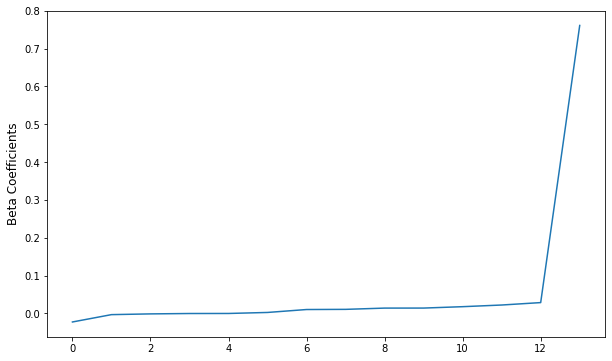

In [36]:
# importing the libraries
from pyspark.ml.classification import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# building a logistic regression model
logReg = LogisticRegression(featuresCol = 'features', labelCol = 'label',    maxIter=10)

# fitting the model in the dataset
modelLR = logReg.fit(trainingData)

# Logistic Regression Model to get the beta coefficients
beta = np.sort(modelLR.coefficients)
plt.figure(figsize=(10,6))
plt.plot(beta)
plt.ylabel('Beta Coefficients',fontsize=12)

# displaying the plot
plt.show()

In [28]:
# predicting the test data with the fitted model
predictionsLR = modelLR.transform(testData)

# displaying the predicted and the actual values of the target variable
predictionsLR.select("prediction", "label").show(5)

# calculating the accuracy of the model
evaluatorLR1 = MulticlassClassificationEvaluator(labelCol="label", 
                                              predictionCol="prediction",metricName="accuracy")
accuracyLR = evaluatorLR1.evaluate(predictionsLR)

print("Using Logistic Regression->\n")
print(" * Accuracy:", round(accuracyLR*100,4),"%\n")
print(" * Test Error:",round(1.0 - accuracyLR,4),"\n")

# calculating the area under ROC of the model
evaluatorLR2 = BinaryClassificationEvaluator()
print(' * Test Area Under ROC '+ str(evaluatorLR2.evaluate(predictionsLR, 
                                                       {evaluatorLR2.metricName: "areaUnderROC"}))+'\n')


# calculating the probability of rainfall tomorrow based on 'MaxTemp','WindSpeed9am','Humidity9am','Pressure9am'
predictionsLR.select('MaxTemp','WindSpeed9am','Humidity9am','Pressure9am',\
                     'label','rawPrediction',
                     'prediction', 'probability').show(5, vertical = True, truncate =False)

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 5 rows

Using Logistic Regression->

 * Accuracy: 81.7135 %

 * Test Error: 0.1829 

 * Test Area Under ROC 0.8098992808186618

-RECORD 0-------------------------------------------------
 MaxTemp       | 15.7                                     
 WindSpeed9am  | 2.0                                      
 Humidity9am   | 86.0                                     
 Pressure9am   | 1026.3                                   
 label         | 0.0                                      
 rawPrediction | [1.946077855433575,-1.946077855433575]   
 prediction    | 0.0                                      
 probability   | [0.8750183417315699,0.12498165826843013] 
-RECORD 1-------------------------------------------------
 MaxTemp       | 12.5                                     
 WindSpeed9am  | 0.0               

### GBTClassifier()

In [29]:
# importing the libraries
from pyspark.ml.classification import GBTClassifier

# building a gradient boosted tree classifier model
graBooTree = GBTClassifier(maxIter=10)

# fitting the model in the dataset
modelGBT = graBooTree.fit(trainingData)

# predicting the test data with the fitted model
predictionsGBT = modelGBT.transform(testData)

# displaying the predictions and the actual values of the target variable
predictionsGBT.select("prediction", "label").show(5)

# calculating the accuracy of the model
evaluatorGBT1 = MulticlassClassificationEvaluator(labelCol="label", 
                                              predictionCol="prediction",metricName="accuracy")
accuracyGBT = evaluatorGBT1.evaluate(predictionsGBT)

print("Using Gradient-Boosted Tree Classifier->\n")
print(" * Accuracy:", round(accuracyGBT*100,4),"%\n")
print(" * Test Error:",round(1.0 - accuracyGBT,4),"\n")

evaluatorGBT2 = BinaryClassificationEvaluator()
print(' * Test Area Under ROC '+ str(evaluatorGBT2.evaluate(predictionsGBT, 
                                                       {evaluatorGBT2.metricName: "areaUnderROC"}))+'\n')

# calculating the probability of rainfall tomorrow based on 'MaxTemp','WindSpeed9am','Humidity9am','Pressure9am'
predictionsGBT.select('MaxTemp','WindSpeed9am','Humidity9am','Pressure9am',\
                     'label','rawPrediction',
                     'prediction', 'probability').show(5, vertical = True, truncate =False)

# print("\n"+ graBooTree.explainParams())

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 5 rows

Using Gradient-Boosted Tree Classifier->

 * Accuracy: 84.0816 %

 * Test Error: 0.1592 

 * Test Area Under ROC 0.8550663693837641

-RECORD 0-------------------------------------------------
 MaxTemp       | 15.7                                     
 WindSpeed9am  | 2.0                                      
 Humidity9am   | 86.0                                     
 Pressure9am   | 1026.3                                   
 label         | 0.0                                      
 rawPrediction | [1.0995886781540778,-1.0995886781540778] 
 prediction    | 0.0                                      
 probability   | [0.9001756128784137,0.09982438712158626] 
-RECORD 1-------------------------------------------------
 MaxTemp       | 12.5                                     
 WindSpeed9am  | 0.0  

### Graph to demonstrate the comparison of the Accuracies


Accuracy of Decision Tree Classifier          : 83.5835 %
Accuracy of Random Forest Classifier          : 83.5741 %
Accuracy of Logistic Regression               : 81.7135 %
Accuracy of Gradient Boosted Tree Classifier  : 84.0816 %



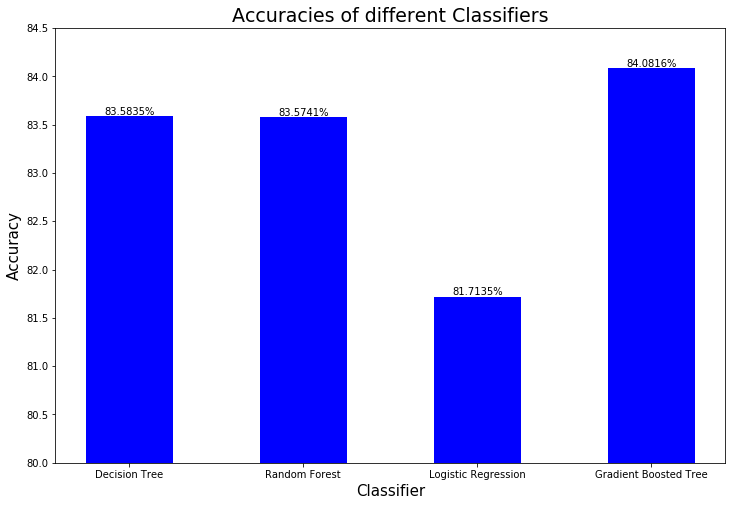

In [30]:
# setting figure size
plt.figure(figsize=(12,8))

classifier = ['Decision Tree','Random Forest','Logistic Regression','Gradient Boosted Tree']
accuracy = [accuracyDT,accuracyRF,accuracyLR,accuracyGBT]
accuracy = [item*100 for item in accuracy]
bar_label = [str(round(accuracyDT*100,4))+"%",
             str(round(accuracyRF*100,4))+"%",
             str(round(accuracyLR*100,4))+"%",
             str(round(accuracyGBT*100,4))+"%"]

# plotting the bar graph of accuracies
bar_plot = plt.bar(classifier,accuracy,width=0.5,color='blue')

# adjusting the axis
ax=plt.gca()
ax.set_ylim(80,84.5)

# labelling the plt
plt.xlabel('Classifier',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title("Accuracies of different Classifiers",fontsize=19)

def autolabel(bar_plot):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,height,
               bar_label[idx],
               ha='center',va='bottom',rotation=0)

autolabel(bar_plot)

print('\nAccuracy of Decision Tree Classifier          :',round(accuracy[0],4),"%")
print('Accuracy of Random Forest Classifier          :',round(accuracy[1],4),"%")
print('Accuracy of Logistic Regression               :',round(accuracy[2],4),"%")
print('Accuracy of Gradient Boosted Tree Classifier  :',round(accuracy[3],4),"%\n")

# displaying the plot
plt.show()

## Step 09: Calculate the confusion matrix and find the precision, recall, and F1 score of each classification algorithm. Explain how the accuracy of the predication can be improved?

Apart from the accuracy, number of false positive and false negative identification also plays an important role on deciding the quality of any particular classification model. The way we can calculate is called confusion matrix.

* Calculate Confusion Matrix
* Find Precision, Recall and F1 score
* Explain how the accuracy of the prediction can be improved

__Definition of the terms:__
* Positive (P) : Observation is positive.
* Negative (N) : Observation is not positive.
* True Positive (TP) : Observation is positive, and is predicted to be positive.
* False Negative (FN) : Observation is positive, but is predicted negative.
* True Negative (TN) : Observation is negative, and is predicted to be negative.
* False Positive (FP) : Observation is negative, but is predicted positive.



__Confusion Matrix:__ A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.<br>


$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;Pred:No\;\;\;\;\;\;\;\;\;\;\;\;Pred:Yes $


$ \;\;True:No\;\;\;\;\;\;\;\;\;\;\;TN\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;FP $


$ \;\;True:Yes\;\;\;\;\;\;\;\;\;\;\;FN\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;TP $<br>


__Recall:__ Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN).
$$ Recall = TP/(TP+FN) $$

__Precision:__ To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).
$$ Precision = TP/(TP+FP) $$

__High recall, low precision:__ This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

__Low recall, high precision:__ This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP).

__F1-measure:__ Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or Recall.
$$ F1-measure = (2*Recall*Precision)/(Recall+Precision) $$

In [31]:
from pyspark.mllib.evaluation import MulticlassMetrics

# defining function for confusion matrix, precision, recall and F1 score (in built functions)
def printMetrics(predictions_and_labels):
    metrics = MulticlassMetrics(predictions_and_labels)
    confusion_matrix = metrics.confusionMatrix()
    print("\n------------------------Inbuilt Calculation of Metrics--------------------")
    print('\nConfusion Matrix\n', confusion_matrix)
    print('Precision           ', metrics.precision(1))
    print('Recall              ', metrics.recall(1))
    print('F-1 Score           ', metrics.fMeasure(1.0))

# defining function for manually calculating precision from the 
def precision_calc(tp,fp):
    precision = tp / (tp + fp)
    return precision

# defining function for manually calculating recall
def recall_calc(tp,fn):
    recall = tp / (tp + fn)
    return recall

# defining function for manually calculating F1 measure
def F1_calc(precision,recall):
    F1 = 2 * (precision * recall) / (precision + recall)
    return F1

# defining function for manual calculation of the metrics from the confusion matrix
def printMetrics_manual(predictions_and_labels):
    confusion_matrix = MulticlassMetrics(predictions_and_labels).confusionMatrix().toArray()
    precision = precision_calc(confusion_matrix[1][1],confusion_matrix[0][1])
    recall = recall_calc(confusion_matrix[1][1],confusion_matrix[1][0])
    F1 = F1_calc(precision,recall)
    print("\n------------------------Manual Calculation of Metrics--------------------")
    print("Confusion Matrix: \n",confusion_matrix)
    print("\nPrecision     ",precision)
    print("Recall        ",recall)
    print("F1 Measure    ",F1)

### DecisionTreeClassifier()

In [32]:
predictions_and_labels = predictionsDT.select('prediction','label').rdd

# calculating metrics manually from the confusion matrix
printMetrics_manual(predictions_and_labels)

# calculating metrics from the inbuilt function for precision, recall, F1 score:
printMetrics(predictions_and_labels)


------------------------Manual Calculation of Metrics--------------------
Confusion Matrix: 
 [[31463.  1518.]
 [ 5470.  4116.]]

Precision      0.7305644302449414
Recall         0.4293761735864803
F1 Measure     0.5408672798948752

------------------------Inbuilt Calculation of Metrics--------------------

Confusion Matrix
 DenseMatrix([[31463.,  1518.],
             [ 5470.,  4116.]])
Precision            0.7305644302449414
Recall               0.4293761735864803
F-1 Score            0.5408672798948752


### RandomForestClassifier()

In [33]:
predictions_and_labels = predictionsRF.select('prediction','label').rdd

# calculating metrics manually from the confusion matrix
printMetrics_manual(predictions_and_labels)

# calculating metrics from the inbuilt function for precision, recall, F1 score:
printMetrics(predictions_and_labels)


------------------------Manual Calculation of Metrics--------------------
Confusion Matrix: 
 [[31964.  1017.]
 [ 5975.  3611.]]

Precision      0.7802506482281764
Recall         0.37669518047152095
F1 Measure     0.5080906148867314

------------------------Inbuilt Calculation of Metrics--------------------

Confusion Matrix
 DenseMatrix([[31964.,  1017.],
             [ 5975.,  3611.]])
Precision            0.7802506482281764
Recall               0.37669518047152095
F-1 Score            0.5080906148867314


### LogisticRegression()

In [34]:
predictions_and_labels = predictionsLR.select('prediction','label').rdd

# calculating metrics manually from the confusion matrix
printMetrics_manual(predictions_and_labels)

# calculating metrics from the inbuilt function for precision, recall, F1 score:
printMetrics(predictions_and_labels)


------------------------Manual Calculation of Metrics--------------------
Confusion Matrix: 
 [[30794.  2187.]
 [ 5597.  3989.]]

Precision      0.6458873056994818
Recall         0.4161276862090549
F1 Measure     0.506154041365309

------------------------Inbuilt Calculation of Metrics--------------------

Confusion Matrix
 DenseMatrix([[30794.,  2187.],
             [ 5597.,  3989.]])
Precision            0.6458873056994818
Recall               0.4161276862090549
F-1 Score            0.506154041365309


### GBTClassifier()

In [35]:
predictions_and_labels = predictionsGBT.select('prediction','label').rdd

# calculating metrics manually from the confusion matrix
printMetrics_manual(predictions_and_labels)

# calculating metrics from the inbuilt function for precision, recall, F1 score:
printMetrics(predictions_and_labels)


------------------------Manual Calculation of Metrics--------------------
Confusion Matrix: 
 [[31436.  1545.]
 [ 5231.  4355.]]

Precision      0.738135593220339
Recall         0.45430836636761945
F1 Measure     0.5624434973524475

------------------------Inbuilt Calculation of Metrics--------------------

Confusion Matrix
 DenseMatrix([[31436.,  1545.],
             [ 5231.,  4355.]])
Precision            0.738135593220339
Recall               0.45430836636761945
F-1 Score            0.5624434973524475


### The Prediction of the accuracy can be improved by the following ways:

* Getting rid of the Outliers:<br>
Presence of outliers generally degrades the model's accuracy. The model becomes a more bias model which lead to inaccurate predictions. It is important to treat outliers in the dataset by deleting the observations, performing transformation, binning, imputation or by treating outlier values separately.
* Get more data or stratified samples: <br>
Getting more data is always good better, if it comes to improve the accuracy of the model. Less data always add on more assumptions and weak correlations. Hence having a larger dataset has always led to improvement of the accuracy of the model.
* Missing Values should be treated appropriately:<br>
"Similar to outliers, missing values can also degrade the quality and accuracy of the model. We can treat missing values of continuous data by imputing mean, median, mode. For categorical variables, we can treat variables as a separate class. A model can also be build to predict the missing values. KNN imputation offers a great option to deal with missing values."
* Feature Transformation: <br>
"Feature Transformation also helps to improve the accuracy of the model. We can do feature transformation by standardization or normalization of the variables. Normalization is changing the scale of the variable from 0 to 1. Also, we can transform the variables using log, square root or inverse of the value of the variable to remove skewness. We must remove skewness from the dataset. Some times, creating bins of numeric data works well, since it handles the outlier values also. Numeric data can be made discrete by grouping values into bins. This is known as data discretization."
* Creating Feautures properly:<br>
"Deriving new variable(s ) from existing variables is known as feature creation. It helps to unleash the hidden relationship of a data set. Let’s say, we want to predict the number of transactions in a store based on transaction dates. Here transaction dates may not have direct correlation with number of transaction, but if we look at the day of a week, it may have a higher correlation. In this case, the information about day of a week is hidden. We need to extract it to make the model better."
* Correlation between the features: <br>
"We shoild also take into consideration the correlation of the predictor variables among themselves i.e pair wise correlation. Correlated variables add no importance to the model. This can be improved by removing one of the highly correlated variables."
* Feature Selection:<br>
"Feature selection is an important aspect of the model's accuracy. Wrong features, that does not give any/less information about the target variable, reduces the accuracy of the model drastically. Features can be properly selected by gaining some domain knowledge, visualization of the dataset, and PCA. PCA is a type of dimensionality reduction technique. There are various methods to reduce the dimensions (features) of training data like factor analysis, low variance, higher correlation, backward/ forward feature selection and others."
* Cross Validation: <br>
"Cross validation technique is very important to calculate the expected mean squared error for the data. Cross Validation is one of the most important concepts in data modeling. It says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model. This method helps us to achieve more generalized relationships."
* Emsembling Methods:<br>
"This is the most common approach found majorly in winning solutions of Data science competitions. This technique simply combines the result of multiple weak models and produce better results. This can be achieved through many ways. It is always a better idea to apply ensemble methods to improve the accuracy of your model. There are two good reasons for this: a ) They are generally more complex than traditional methods. b) The traditional methods give you a good base level from which you can improve and draw from to create your ensembles.


__________________________________________________________________

# References:
* https://stackoverflow.com/questions/29600673/how-to-delete-columns-in-pyspark-dataframe -> drop a column
* https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe -> count the NA values
* https://stackoverflow.com/questions/46956026/how-to-convert-column-with-string-type-to-int-form-in-pyspark-data-frame -> change the datatype of column
* https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html -> calculating mean of a column
* https://stackoverflow.com/questions/44773758/how-to-conditionally-replace-value-in-a-column-based-on-evaluation-of-expression -> how to replace a value in a column
* https://stackoverflow.com/questions/38150885/looking-for-a-way-to-calculate-frequency-distribution-of-a-dataframe-in-spark-sc -> calculate frequency of words in a specific column
* https://stackoverflow.com/questions/36942233/apply-stringindexer-to-several-columns-in-a-pyspark-dataframe -> convert non-numeric column to numeric using StringIndexer()
* https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/3741049972324885/3783546674231736/4413065072037724/latest.html -> confusion matrix
* https://mapr.com/blog/churn-prediction-pyspark-using-mllib-and-ml-packages/ -> confusion matrix
* https://medium.com/@achilleus/spark-session-10d0d66d1d24 -> definitions for SparkSession
* https://www.gangboard.com/blog/what-is-pyspark/ -> definition for PySpark
* https://www.tutorialspoint.com/pyspark/pyspark_sparkcontext.htm -> definitions for SparkContext
* https://www.geeksforgeeks.org/confusion-matrix-machine-learning/ -> confusion matrix
* https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html -> bar graph
* https://stackoverflow.com/questions/45177937/how-can-i-adapt-the-autolabel-function-in-matplotlib-so-that-it-displays-negativ -> bar graph
* https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/ -> improving the accuracy of the model